<a href="https://colab.research.google.com/github/Meenusj/Case_study/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas nltk spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import pandas as pd
import nltk
import spacy

# Load the CSV file
csv_file_path = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(csv_file_path, sep=';')

# Preview the data
print(df.head())


      screen_name                                               text  \
0      imranyebot                             YEA now that note GOOD   
1          zawvrk  Listen to This Charming Man by The Smiths  htt...   
2        zawarbot  wish i can i would be seeing other hoes on the...   
3  ahadsheriffbot  The decade in the significantly easier schedul...   
4   kevinhookebot  "Theim class=\"alignnone size-full wp-image-60...   

  account.type class_type  
0          bot     others  
1        human      human  
2          bot     others  
3          bot     others  
4          bot        rnn  


## Extract Vocabulary Features

In [2]:
from collections import Counter
import numpy as np

# Initialize spaCy
nlp = spacy.load("en_core_web_sm")

def calculate_vocabulary_features(texts):
    all_words = []
    total_length = 0

    for text in texts:
        doc = nlp(text)
        words = [token.text for token in doc if token.is_alpha]
        all_words.extend(words)
        total_length += len(words)

    vocab_size = len(set(all_words))
    density = 100 * vocab_size / total_length

    avg_length = total_length / len(texts)

    return avg_length, vocab_size, density

# Split the data by account type
human_texts = df[df['account.type'] == 'human']['text'].tolist()
bot_texts = df[df['account.type'] == 'bot']['text'].tolist()

# Calculate features
human_features = calculate_vocabulary_features(human_texts)
bot_features = calculate_vocabulary_features(bot_texts)

print("Human Vocabulary Features (Average Length, Vocab Size, Density):", human_features)
print("Bot Vocabulary Features (Average Length, Vocab Size, Density):", bot_features)


Human Vocabulary Features (Average Length, Vocab Size, Density): (17.125506854605135, 20168, 11.36955565828194)
Bot Vocabulary Features (Average Length, Vocab Size, Density): (18.2264825188333, 20430, 10.825733770672489)


## Perform Part-of-Speech Analysis

In [3]:
def pos_analysis(texts):
    pos_counts = Counter()

    for text in texts:
        doc = nlp(text)
        pos_counts.update([token.pos_ for token in doc])

    return pos_counts

# Perform POS analysis
human_pos_counts = pos_analysis(human_texts)
bot_pos_counts = pos_analysis(bot_texts)

print("Human POS Counts:", human_pos_counts)
print("Bot POS Counts:", bot_pos_counts)


Human POS Counts: Counter({'NOUN': 36577, 'VERB': 25752, 'PROPN': 24133, 'PUNCT': 22416, 'PRON': 20772, 'ADP': 19031, 'DET': 14410, 'ADJ': 13304, 'AUX': 11811, 'ADV': 9288, 'CCONJ': 5782, 'PART': 5657, 'X': 4331, 'SCONJ': 3612, 'NUM': 3098, 'SPACE': 1966, 'INTJ': 1095, 'SYM': 975})
Bot POS Counts: Counter({'NOUN': 40053, 'DET': 24538, 'VERB': 23865, 'ADP': 22742, 'PRON': 20651, 'PUNCT': 20034, 'PROPN': 15943, 'AUX': 12231, 'ADJ': 11633, 'ADV': 7449, 'PART': 6525, 'CCONJ': 5868, 'SCONJ': 3620, 'X': 2467, 'NUM': 1919, 'INTJ': 941, 'SYM': 902, 'SPACE': 692})


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Human POS Counts: Counter({'NOUN': 36577, 'VERB': 25752, 'PROPN': 24133, 'PUNCT': 22416, 'PRON': 20772, 'ADP': 19031, 'DET': 14410, 'ADJ': 13304, 'AUX': 11811, 'ADV': 9288, 'CCONJ': 5782, 'PART': 5657, 'X': 4331, 'SCONJ': 3612, 'NUM': 3098, 'SPACE': 1966, 'INTJ': 1095, 'SYM': 975})
Bot POS Counts: Counter({'NOUN': 40053, 'DET': 24538, 'VERB': 23865, 'ADP': 22742, 'PRON': 20651, 'PUNCT': 20034, 'PROPN': 15943, 'AUX': 12231, 'ADJ': 11633, 'ADV': 7449, 'PART': 6525, 'CCONJ': 5868, 'SCONJ': 3620, 'X': 2467, 'NUM': 1919, 'INTJ': 941, 'SYM': 902, 'SPACE': 692})


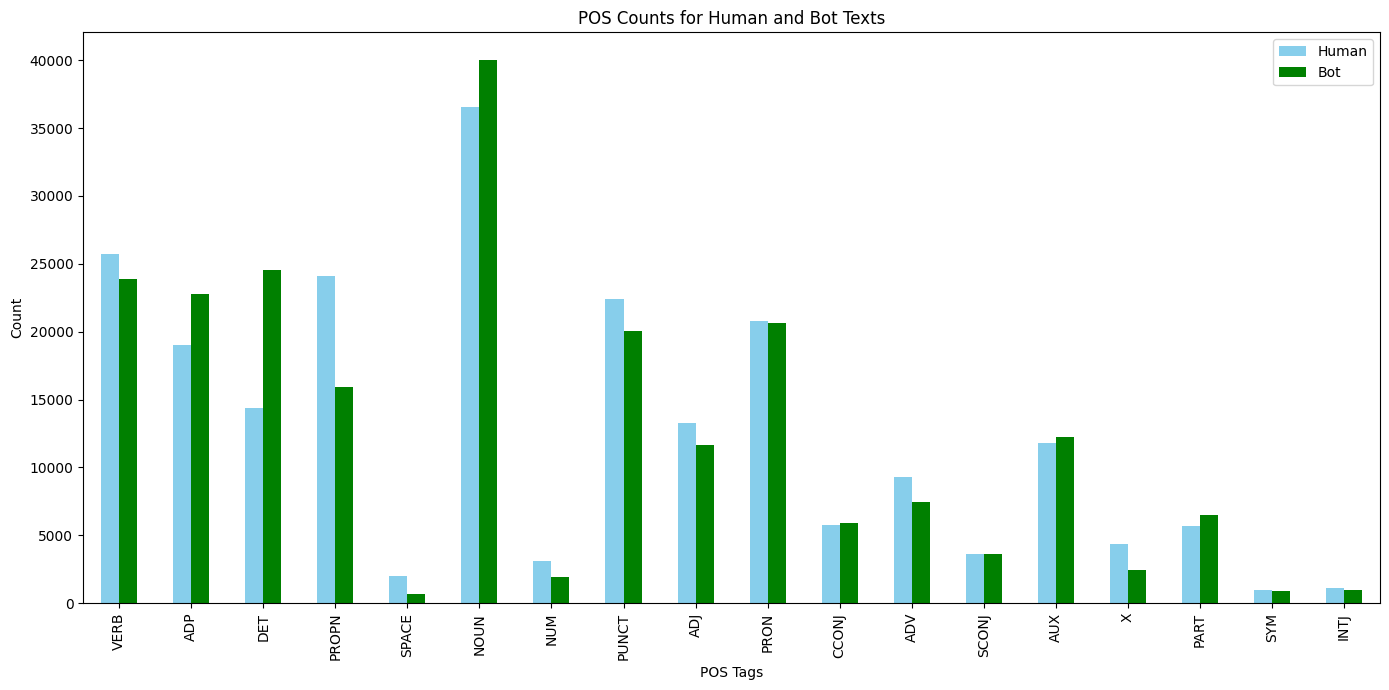

In [10]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt



# Initialize spaCy
nlp = spacy.load("en_core_web_sm")

# Split the data by account type
human_texts = df[df['account.type'] == 'human']['text'].tolist()
bot_texts = df[df['account.type'] == 'bot']['text'].tolist()

# POS Analysis Function
def pos_analysis(texts):
    pos_counts = Counter()

    for text in texts:
        doc = nlp(text)
        pos_counts.update([token.pos_ for token in doc])

    return pos_counts

# Perform POS analysis
human_pos_counts = pos_analysis(human_texts)
bot_pos_counts = pos_analysis(bot_texts)

print("Human POS Counts:", human_pos_counts)
print("Bot POS Counts:", bot_pos_counts)

# Convert POS counts to DataFrame
human_pos_df = pd.DataFrame.from_dict(human_pos_counts, orient='index', columns=['Human']).reset_index().rename(columns={'index': 'POS'})
bot_pos_df = pd.DataFrame.from_dict(bot_pos_counts, orient='index', columns=['Bot']).reset_index().rename(columns={'index': 'POS'})

# Merge DataFrames
pos_df = pd.merge(human_pos_df, bot_pos_df, on='POS', how='outer').fillna(0).set_index('POS')

# Plotting
ax = pos_df.plot(kind='bar', figsize=(14, 7), color=['skyblue', 'green'])

# Add title and labels
ax.set_title('POS Counts for Human and Bot Texts')
ax.set_ylabel('Count')
ax.set_xlabel('POS Tags')

plt.tight_layout()
plt.show()



## Perform Dependency Analysis

In [4]:
def dependency_analysis(texts):
    dep_counts = Counter()
    dep_distances = []

    for text in texts:
        doc = nlp(text)
        for token in doc:
            dep_counts[token.dep_] += 1
            dep_distances.append(abs(token.head.i - token.i))

    avg_dep_distance = np.mean(dep_distances)

    return dep_counts, avg_dep_distance

# Perform dependency analysis
human_dep_counts, human_avg_dep_distance = dependency_analysis(human_texts)
bot_dep_counts, bot_avg_dep_distance = dependency_analysis(bot_texts)

print("Human Dependency Counts:", human_dep_counts)
print("Human Average Dependency Distance:", human_avg_dep_distance)
print("Bot Dependency Counts:", bot_dep_counts)
print("Bot Average Dependency Distance:", bot_avg_dep_distance)


Human Dependency Counts: Counter({'punct': 24208, 'ROOT': 19094, 'nsubj': 18553, 'prep': 17399, 'pobj': 16337, 'det': 14272, 'compound': 13139, 'dobj': 12788, 'advmod': 10146, 'amod': 9778, 'aux': 9421, 'conj': 6203, 'cc': 5791, 'poss': 4651, 'ccomp': 3971, 'npadvmod': 3186, 'dep': 3173, 'advcl': 3142, 'attr': 2925, 'xcomp': 2556, 'mark': 2241, 'acomp': 2176, 'appos': 2105, 'nmod': 2082, 'relcl': 2071, 'neg': 2011, 'nummod': 1880, 'pcomp': 1297, 'prt': 1034, 'acl': 1032, 'auxpass': 950, 'intj': 934, 'nsubjpass': 772, 'case': 639, 'dative': 306, 'expl': 305, 'quantmod': 277, 'csubj': 253, 'agent': 245, 'oprd': 230, 'predet': 195, 'meta': 93, 'parataxis': 86, 'preconj': 57, 'csubjpass': 6})
Human Average Dependency Distance: 2.5659702691844113
Bot Dependency Counts: Counter({'det': 24281, 'punct': 21532, 'prep': 21510, 'pobj': 20083, 'nsubj': 17878, 'ROOT': 14946, 'dobj': 11433, 'compound': 10115, 'aux': 9467, 'advmod': 8316, 'amod': 8040, 'cc': 5910, 'conj': 5762, 'ccomp': 4475, 'attr':

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Human Dependency Counts: Counter({'punct': 24208, 'ROOT': 19094, 'nsubj': 18553, 'prep': 17399, 'pobj': 16337, 'det': 14272, 'compound': 13139, 'dobj': 12788, 'advmod': 10146, 'amod': 9778, 'aux': 9421, 'conj': 6203, 'cc': 5791, 'poss': 4651, 'ccomp': 3971, 'npadvmod': 3186, 'dep': 3173, 'advcl': 3142, 'attr': 2925, 'xcomp': 2556, 'mark': 2241, 'acomp': 2176, 'appos': 2105, 'nmod': 2082, 'relcl': 2071, 'neg': 2011, 'nummod': 1880, 'pcomp': 1297, 'prt': 1034, 'acl': 1032, 'auxpass': 950, 'intj': 934, 'nsubjpass': 772, 'case': 639, 'dative': 306, 'expl': 305, 'quantmod': 277, 'csubj': 253, 'agent': 245, 'oprd': 230, 'predet': 195, 'meta': 93, 'parataxis': 86, 'preconj': 57, 'csubjpass': 6})
Human Average Dependency Distance: 2.5659702691844113
Bot Dependency Counts: Counter({'det': 24281, 'punct': 21532, 'prep': 21510, 'pobj': 20083, 'nsubj': 17878, 'ROOT': 14946, 'dobj': 11433, 'compound': 10115, 'aux': 9467, 'advmod': 8316, 'amod': 8040, 'cc': 5910, 'conj': 5762, 'ccomp': 4475, 'attr':

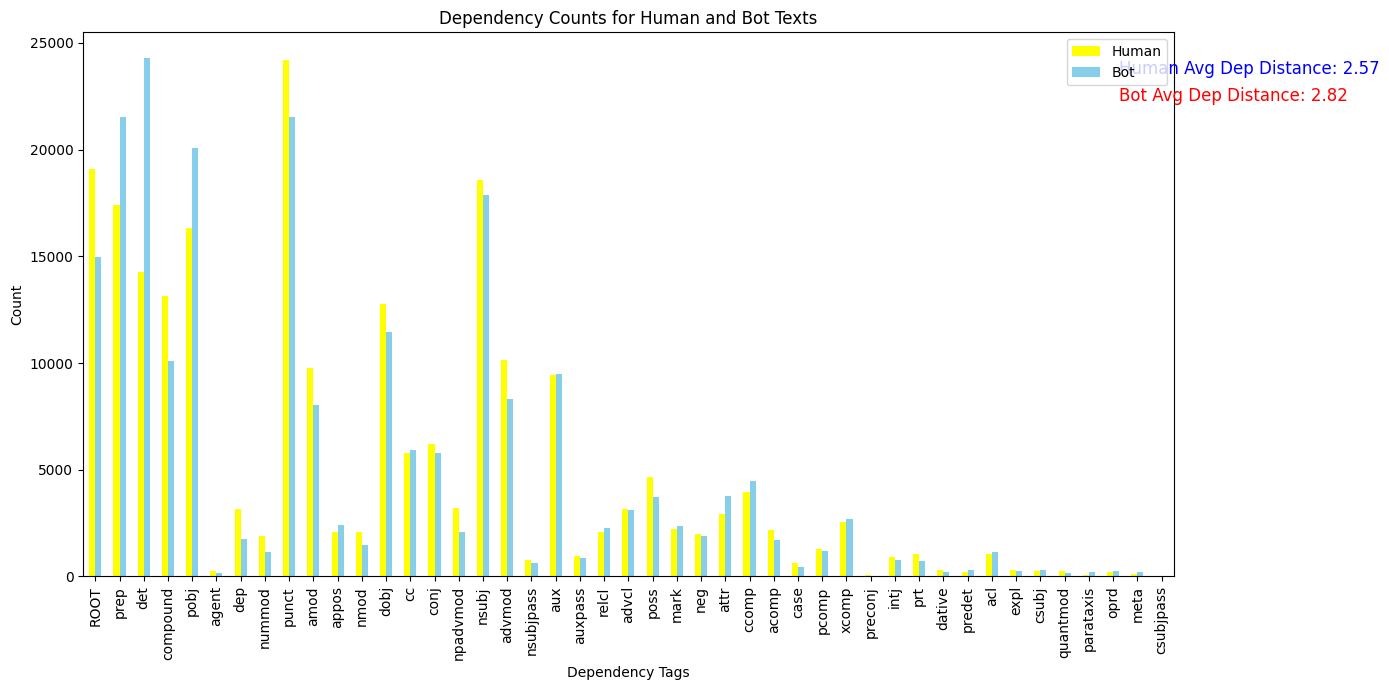

In [9]:
import pandas as pd
import spacy
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


# Initialize spaCy
nlp = spacy.load("en_core_web_sm")

# Split the data by account type
human_texts = df[df['account.type'] == 'human']['text'].tolist()
bot_texts = df[df['account.type'] == 'bot']['text'].tolist()

# Dependency Analysis Function
def dependency_analysis(texts):
    dep_counts = Counter()
    dep_distances = []

    for text in texts:
        doc = nlp(text)
        for token in doc:
            dep_counts[token.dep_] += 1
            dep_distances.append(abs(token.head.i - token.i))

    avg_dep_distance = np.mean(dep_distances)

    return dep_counts, avg_dep_distance

# Perform dependency analysis
human_dep_counts, human_avg_dep_distance = dependency_analysis(human_texts)
bot_dep_counts, bot_avg_dep_distance = dependency_analysis(bot_texts)

print("Human Dependency Counts:", human_dep_counts)
print("Human Average Dependency Distance:", human_avg_dep_distance)
print("Bot Dependency Counts:", bot_dep_counts)
print("Bot Average Dependency Distance:", bot_avg_dep_distance)

# Convert dependency counts to DataFrame
human_dep_df = pd.DataFrame.from_dict(human_dep_counts, orient='index', columns=['Human']).reset_index().rename(columns={'index': 'Dependency'})
bot_dep_df = pd.DataFrame.from_dict(bot_dep_counts, orient='index', columns=['Bot']).reset_index().rename(columns={'index': 'Dependency'})

# Merge DataFrames
dep_df = pd.merge(human_dep_df, bot_dep_df, on='Dependency', how='outer').fillna(0).set_index('Dependency')

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot dependency counts
dep_df.plot(kind='bar', ax=ax, color=['yellow', 'skyblue'])

# Add average dependency distance as text annotations
ax.text(0.95, 0.95, f'Human Avg Dep Distance: {human_avg_dep_distance:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', color='blue')
ax.text(0.95, 0.90, f'Bot Avg Dep Distance: {bot_avg_dep_distance:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', color='red')

# Add title and labels
ax.set_title('Dependency Counts for Human and Bot Texts')
ax.set_ylabel('Count')
ax.set_xlabel('Dependency Tags')

plt.tight_layout()
plt.show()


## Sentimental analysis

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Human Sentiment Distribution: {'neutral': 41.58138636802472, 'negative': 30.8167599922765, 'positive': 27.60185363969878}
Bot Sentiment Distribution: {'positive': 19.30654819393471, 'negative': 31.746185049256326, 'neutral': 48.94726675680896}


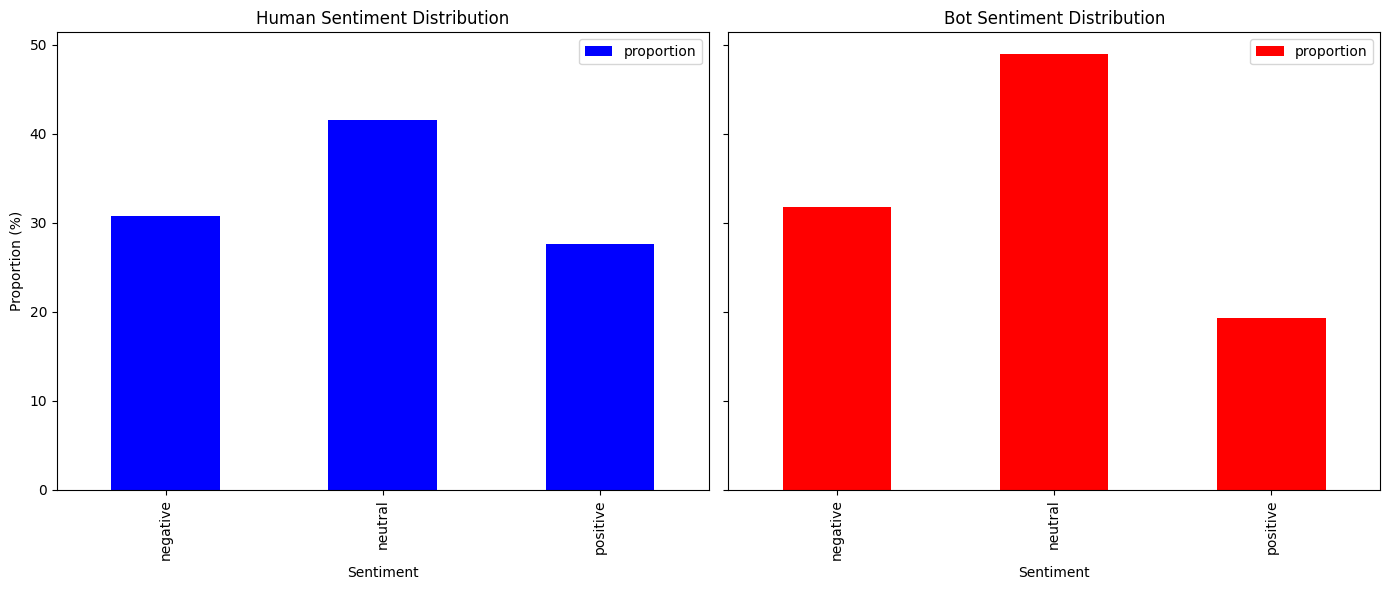

In [11]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter


# Initialize the sentiment analysis pipeline
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Split the data by account type
human_texts = df[df['account.type'] == 'human']['text'].tolist()
bot_texts = df[df['account.type'] == 'bot']['text'].tolist()

# Perform sentiment analysis
def analyze_sentiments(texts, tokenizer, max_length=512):
    sentiments = []
    for text in texts:
        # Tokenize the text and truncate if necessary
        tokens = tokenizer(text, truncation=True, max_length=max_length, return_tensors='pt')
        # Ensure the text is not empty after truncation
        if tokens['input_ids'].shape[1] > 0:
            result = sentiment_pipeline(tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True))
            sentiments.append(result[0]['label'])
    return sentiments

# Analyze sentiments for human and bot texts
human_sentiments = analyze_sentiments(human_texts, tokenizer)
bot_sentiments = analyze_sentiments(bot_texts, tokenizer)

# Count sentiment labels
def count_sentiments(sentiments):
    sentiment_counts = Counter(sentiments)
    total = sum(sentiment_counts.values())
    return {k: v / total * 100 for k, v in sentiment_counts.items()}

human_sentiment_counts = count_sentiments(human_sentiments)
bot_sentiment_counts = count_sentiments(bot_sentiments)

print("Human Sentiment Distribution:", human_sentiment_counts)
print("Bot Sentiment Distribution:", bot_sentiment_counts)

# Convert to DataFrame for plotting
human_sentiment_df = pd.DataFrame.from_dict(human_sentiment_counts, orient='index', columns=['proportion'])
bot_sentiment_df = pd.DataFrame.from_dict(bot_sentiment_counts, orient='index', columns=['proportion'])

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Human sentiment distribution plot
human_sentiment_df.sort_index().plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Human Sentiment Distribution')
ax[0].set_ylabel('Proportion (%)')
ax[0].set_xlabel('Sentiment')

# Bot sentiment distribution plot
bot_sentiment_df.sort_index().plot(kind='bar', ax=ax[1], color='red')
ax[1].set_title('Bot Sentiment Distribution')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()


## Perplexity

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1588 > 1024). Running this sequence through the model will result in indexing errors


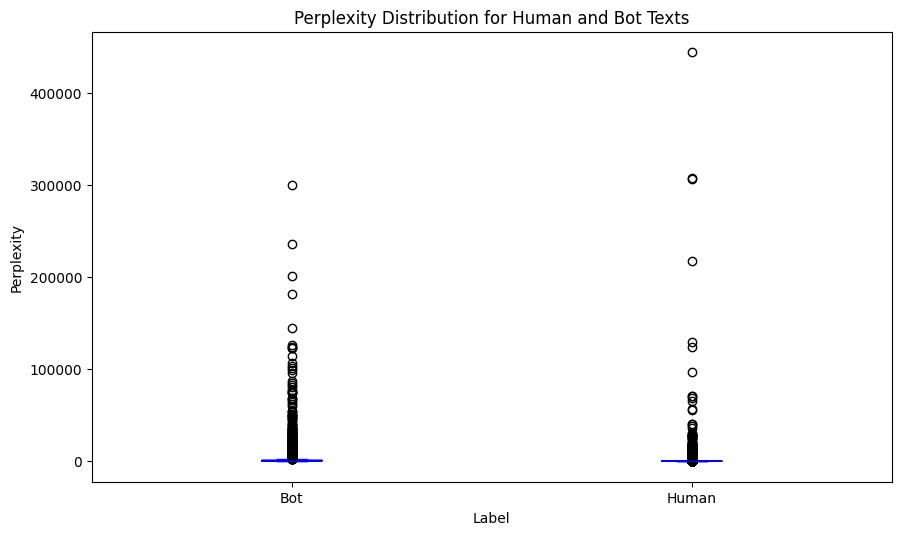

In [8]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import matplotlib.pyplot as plt


# Load pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.eval()

# Function to calculate perplexity
def calculate_perplexity(texts):
    ppl_scores = []
    for text in texts:
        encodings = tokenizer(text, return_tensors='pt')
        max_length = model.config.n_positions
        stride = 512

        lls = []
        for i in range(0, encodings.input_ids.size(1), stride):
            begin_loc = max(i + stride - max_length, 0)
            end_loc = min(i + stride, encodings.input_ids.size(1))
            trg_len = end_loc - i    # may be different from stride on last loop
            input_ids = encodings.input_ids[:,begin_loc:end_loc].to(model.device)
            target_ids = input_ids.clone()
            target_ids[:,:-trg_len] = -100

            with torch.no_grad():
                outputs = model(input_ids, labels=target_ids)
                log_likelihood = outputs[0] * trg_len

            lls.append(log_likelihood)

        ppl = torch.exp(torch.stack(lls).sum() / end_loc)
        ppl_scores.append(ppl.item())
    return ppl_scores

# Split the data by account type
human_texts = df[df['account.type'] == 'human']['text'].tolist()
bot_texts = df[df['account.type'] == 'bot']['text'].tolist()

# Calculate Perplexity for human and bot texts
human_ppl = calculate_perplexity(human_texts)
bot_ppl = calculate_perplexity(bot_texts)

# Create DataFrame for plotting
ppl_df = pd.DataFrame({
    'Perplexity': human_ppl + bot_ppl,
    'Label': ['Human'] * len(human_ppl) + ['Bot'] * len(bot_ppl)
})

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot perplexity distributions
ppl_df.boxplot(column='Perplexity', by='Label', ax=ax, grid=False, color='blue', notch=True)
ax.set_title('Perplexity Distribution for Human and Bot Texts')
ax.set_xlabel('Label')
ax.set_ylabel('Perplexity')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by Label' title

plt.show()
